# A. Linear Optimisations on 2D and 3D data

Given a two-dimensional data points, we want to find a linear function which best estimates them.

In [107]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *

init_printing(use_unicode=True)

### Input 2D Data Points `X`
Initialise all input data `X` for optimisation problems.

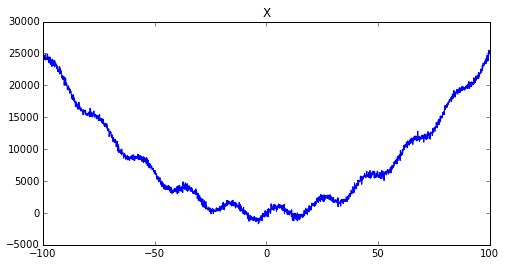

In [120]:
def f(t):
    return 2.5*t**2 - 100

t  = np.arange(-100,100,0.1)
x0 = f(t) # Raw X
n  = np.random.normal(0,300,x0.shape) # Gaussian noises
m  = 1000*np.sin(t/np.pi) # Ripple noises

# Noisy data points `X` we want to estimate
x  = x0 + n + m

plt.figure(1)
plt.figure(figsize=(8,4))
plt.title('X')
plt.plot(t, x)
plt.show()


# (A.1) Fitting with Least Square Error

Given data points `X`, we want to find the best estimated polynomial 
which yields minimal least square error.

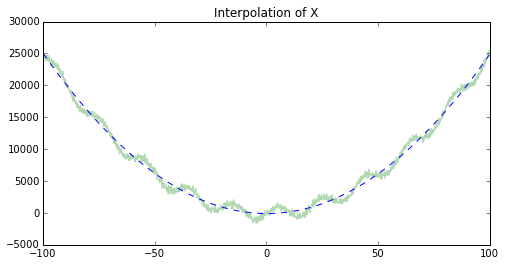

Estimated X with parabola:


In [119]:
c  = np.polyfit(t, x, 2) # Coefficients of degree-2 polynomial
ft = np.poly1d(c) # Generate polynomial func

x_ = ft(t) # Generate interpolated values

plt.figure(1)
plt.figure(figsize=(8,4))
plt.plot(t, x, color='green', alpha=0.3)
plt.plot(t, x_, color='blue', linestyle='dashed')
plt.title('Interpolation of X')
plt.show()

# Build symbolic polynomial expression 
z = symbols('x')
p = c[0]*z**2 + c[1]*z + c[0]
print('Estimated X with parabola:')
p

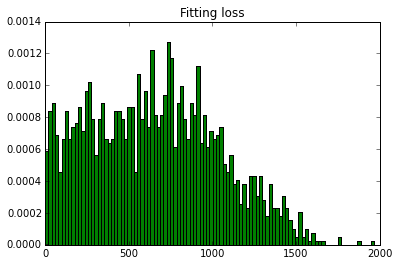

RMSE = 572923.596


In [102]:
# Compute the distributions of errors
e    = np.abs(x - x_)
rmse = np.mean((x - x_)**2)

plt.figure(1)
plt.title('Fitting loss')
plt.hist(e, 100, normed=1, facecolor='g')
plt.show()

print('RMSE = {0:0.3f}'.format(rmse))

# 3D data

Now move on to optimise the estimates over 3D data points. Say we have a set of noisy paraboloid data points `Z`. We want to find **global minima** with various linear optimisation techniques.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


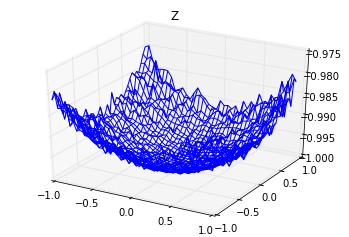

In [129]:
def g(X,Y):
    # Paraboloid with ripple noises
    return (X**2 + Y**2)/100 - np.random.normal(1, (X**2 + Y**2)/1000)

res = 0.05
X = np.arange(-1,1,res)
Y = np.arange(-1,1,res)
X,Y = np.meshgrid(X,Y)

# Noisy data (X,Y,Z) now ready for fitting
Z = g(X,Y)

from mpl_toolkits.mplot3d import Axes3D

fig  = plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X,Y,Z)
plt.title('Z')
plt.show()


# (A.2) Gradient Descent (Steepest Descent)

Search for the global minima of `Z` towards the gradient of it.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


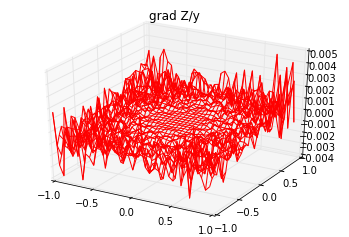

Coordinate of minima : (-0.050,-0.050,-1.000)


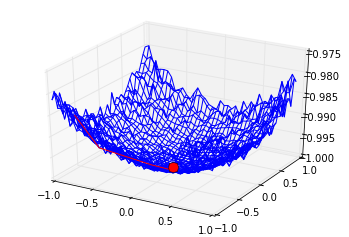

In [141]:
# Calculate gradient of Z
dZy,dZx = np.gradient(Z)

# Plot gradient
fig  = plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X,Y,dZy,color='r')
plt.title('grad Z/y')
plt.show()

# Random where to start searching (preferrably from the edge)
u,v = np.random.choice(range(5),2)

routex = [X[v][u]]
routey = [Y[v][u]]
routez = [Z[v][u]]
iters  = 10
alpha  = 500
i      = 0


while i<iters:
    x  = X[v][u]
    y  = Y[v][u]
    # Update x,y with respect to the gradient at (x,y)
    # x' = x - alpha* grad(x)
    dx = alpha * dZx[v][u]
    dy = alpha * dZy[v][u]
            
    # Find the next position to traverse
    du = int(np.ceil(dx/res))
    dv = int(np.ceil(dy/res))
    
    u  = u - du
    v  = v - dv
    
    routex.append(X[v][u])
    routey.append(Y[v][u])
    routez.append(Z[v][u])
    i += 1

# Visualise the path
fig  = plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')

minx, miny, minz = routex[-1], routey[-1], routez[-1]

ax3d.plot_wireframe(X, Y, Z) # Raw Z
ax3d.plot(routex, routey, zs=routez, color='r') # Gradient descent path
ax3d.plot([minx], [miny], [minz], 'o', color='r', markersize=10) # Minima point


print('Coordinate of minima : ({0:.3f},{1:.3f},{2:.3f})'.format(minx,miny,minz))


# (A.3) Stochastic Gradient Descent

Instead of calculating the gradient of the entire `Z`, we apply it on the stochastically sampled of `Z` instead.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


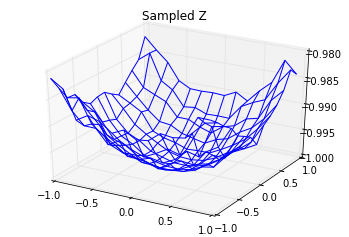

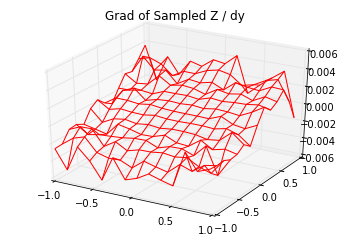

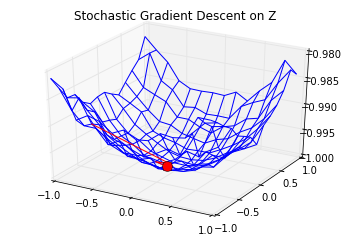

Coordinate of minima : (-0.100,-0.100,-1.000)


In [94]:
# Uniformly sample Z as Z' by 3 times
Z_ = Z[::3,::3]
X_ = X[::3,::3]
Y_ = Y[::3,::3]

# Plot sampled Z'
fig  = plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X_,Y_,Z_,color='b')
plt.title('Sampled Z')
plt.show()

# Compute Gradient of Z'
dZy_,dZx_ = np.gradient(Z_)

# Plot Grad Z'
fig  = plt.figure(2)
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X_,Y_,dZy_,color='r')
plt.title('Grad of Sampled Z / dy')
plt.show()

# Random where to start searching (preferrably from the edge)
u,v = np.random.choice(range(5),2)

routex = [X_[v][u]]
routey = [Y_[v][u]]
routez = [Z_[v][u]]
iters  = 5
alpha  = 100
i      = 0


while i<iters:
    x  = X_[v][u]
    y  = Y_[v][u]
    # Update x,y with respect to the gradient at (x,y)
    # x' = x - alpha* grad(x)
    dx = alpha * dZx_[v][u]
    dy = alpha * dZy_[v][u]
            
    # Find the next position to traverse
    du = int(np.ceil(dx/res))
    dv = int(np.ceil(dy/res))
    
    u  = u - du
    v  = v - dv
    
    routex.append(X_[v][u])
    routey.append(Y_[v][u])
    routez.append(Z_[v][u])
    i += 1

# Visualise the path
fig  = plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')

minx, miny, minz = routex[-1], routey[-1], routez[-1]

ax3d.plot_wireframe(X_, Y_, Z_) # Raw Z
ax3d.plot(routex, routey, zs=routez, color='r') # Stochastic Gradient descent path
ax3d.plot([minx], [miny], [minz], 'o', color='r', markersize=10) # Minima point

plt.title('Stochastic Gradient Descent on Z')
plt.show()

print('Coordinate of minima : ({0:.3f},{1:.3f},{2:.3f})'.format(minx,miny,minz))


# B. Non Linear Optimisation

# (B.1) Newton's method (non-linear method actually)
[Newton's method](http://mathfaculty.fullerton.edu/mathews/n2003/NewtonSearchMod.html) is an estimation method for finding roots of a function. Then approximate minima from them. Basically Hessian strongly accounts for curvature of the function so it's no surprise it would get stuck in the noisy area of the data.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


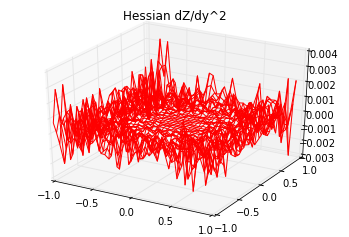

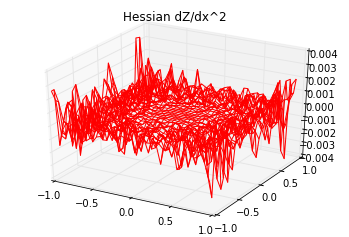

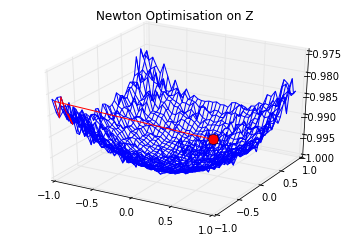

Coordinate of minima : (0.950,-0.950,-0.984)


In [95]:
# Estimate Hessian of Z 
hZxy, hZxx = np.gradient(dZx)
hZyy, hZyx = np.gradient(dZy)

# Plot Hessians
fig  = plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X,Y,hZyy,color='r')
plt.title('Hessian dZ/dy^2')
plt.show()

fig  = plt.figure(2)
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X,Y,hZxx,color='r')
plt.title('Hessian dZ/dx^2')
plt.show()


# Random where to start searching (preferrably from the edge)
u,v = np.random.choice(range(5),2)

routex = [X[v][u]]
routey = [Y[v][u]]
routez = [Z[v][u]]
iters  = 100
alpha  = 0.0005 # Step size
i      = 0

while i<iters:
    x = X[v][u]
    y = Y[v][v]

    # Update the path such that
    # dx = -H(z)^-1 . Grad(z) 
    #   ~= - z'/z''
    hx = hZxx[v][u]
    hy = hZyy[v][u]
    
    # Stop if hessian value approaches zero
    if np.sqrt(hx**2 + hy**2)<0.000001: break
    
    dx = -(1/hx) * dZx[v][u] * alpha
    dy = -(1/hy) * dZy[v][u] * alpha
    
    # Find the next position to traverse
    du = int(np.ceil(dx/res))
    dv = int(np.ceil(dy/res))
    
    u  = u - du
    v  = v - dv
    
    routex.append(X[v][u])
    routey.append(Y[v][u])
    routez.append(Z[v][u])
    i += 1
    
    
# Visualise the path
fig  = plt.figure(3)
ax3d = fig.add_subplot(111, projection='3d')

minx, miny, minz = routex[-1], routey[-1], routez[-1]

ax3d.plot_wireframe(X, Y, Z, antialiaseds=True) # Raw Z
ax3d.plot(routex, routey, zs=routez, color='r') # Newton's path
ax3d.plot([minx], [miny], [minz], 'o', color='r', markersize=10) # Minima point

plt.title('Newton Optimisation on Z')
plt.show()

print('Coordinate of minima : ({0:.3f},{1:.3f},{2:.3f})'.format(minx,miny,minz))    


# (B.2) Broyden-Fletcher-Goldfarb-Shanno (BFGS)

A variation of Newton's method for non-linear minima search. Instead of direct calculation of Hessian matrix, it estimates the Hessian matrix for the subsequent step using a particular formula.


step: (-13.000, -4.000)
step: (-16.000, 0.000)
step: (-48.000, 0.000)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


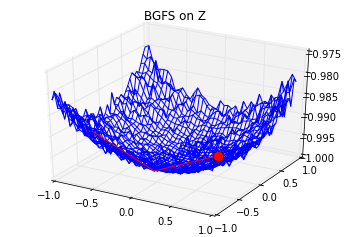

Coordinate of minima : (0.800,-0.550,-0.991)


In [225]:
# Random where to start searching (preferrably from the edge)
u,v = np.random.choice(range(5,8),2)

routex = [X[v][u]]
routey = [Y[v][u]]
routez = [Z[v][u]]
iters  = 100
i      = 0

inv = np.linalg.inv

# Initial step:
# Excerpt Gradient over the window of 3x3
gZxi = dZx[v-1:v+2, u-1:u+2]
gZyi = dZy[v-1:v+2, u-1:u+2]

# Compute Hessian value at (x,y) within the window
hyy, _   = np.gradient(gZyi)
_  , hxx = np.gradient(gZxi)


while i<iters:
    x = X[v][u]
    y = Y[v][v]
    
    # Estimated Hessian values at the current position (x,y)
    hy = hyy[1][1]
    hx = hxx[1][1]
    
    # Solve for the direction p where
    # p = -H(z)^-1 . Grad(z)
    py = -inv(hyy)*gZyi
    px = -inv(hxx)*gZxi
    
    # Normalise the matrices `p` so the values are not
    # too overshooting
    py /= np.abs(np.max(py))
    px /= np.abs(np.max(px))
    
    pxi = px[1][1]
    pyi = py[1][1]
    
    # Determine the smallest step `s` to take
    du = int(np.ceil(pxi/res))
    dv = int(np.ceil(pyi/res)) 
    # Normalise the step size
    d   = max(min(du,dv),1)
    du /= d
    dv /= d
    
    # TAODEBUG:
    print('step: ({0:.3f}, {1:.3f})'.format(du, dv))
    
    u0,v0 = u, v
    u ,v  = u - du, v - dv
    
    # Stop as it exceeds the boundaries
    if u<0 or v<0 or u>X.shape[1] or v>X.shape[1]: 
        break

    
    routex.append(X[v][u])
    routey.append(Y[v][u])
    routez.append(Z[v][u])
    
    
    # Next gradient window
    gZxn  = dZx[v-1:v+2, u-1:u+2]
    gZyn  = dZy[v-1:v+2, u-1:u+2]    
            
    # y = Grad of next (x,y) - Grad of current (x,y)
    yi = gZxn - gZxi
    yj = gZyn - gZyi

    # Determine the next hessian values
    # h' = h + (y*yT) - (h*pT*p*h)
    #          ------   ----------
    #          (yT*p)   (pT*h*p)

    hxx = hxx + (yi*yi.T)/(yi.T*px) - (hxx*px.T*px*hxx)/(px.T*hxx*px)
    hyy = hyy + (yj*yj.T)/(yj.T*py) - (hyy*py.T*py*hyy)/(py.T*hyy*py)
    
    i += 1
    
# Visualise the path
fig  = plt.figure(3)
ax3d = fig.add_subplot(111, projection='3d')

minx, miny, minz = routex[-1], routey[-1], routez[-1]

ax3d.plot_wireframe(X, Y, Z, antialiaseds=True) # Raw Z
ax3d.plot(routex, routey, zs=routez, color='r') # Newton's path
ax3d.plot([minx], [miny], [minz], 'o', color='r', markersize=10) # Minima point

plt.title('BGFS on Z')
plt.show()

print('Coordinate of minima : ({0:.3f},{1:.3f},{2:.3f})'.format(minx,miny,minz))    
